## Observations and Insights 

In [1]:
# 1 Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata = pd.DataFrame(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
len(mouse_metadata)

249

In [3]:
study_results = pd.read_csv(study_results_path)
study_results = pd.DataFrame(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
len(study_results)

1893

In [5]:
# 2 Combine the data into a single dataset
# concatenate?
# frames = [mouse_metadata, study_results]
# merged_df = pd.concat(frames)

# or append?
# merged_df = mouse_metadata.append(study_results)

# or join?
# merged_df = pd.DataFrame.join(mouse_metadata, study_results)

# or merge?
merged_df = mouse_metadata.merge(study_results)

merged_df = pd.DataFrame(merged_df)
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# 3a Getting the duplicate mice by ID number
# that shows up for Mouse ID and Timepoint.
# 3b Optional: Get all the data for the duplicate mouse ID. 

duplicateMouse = merged_df[merged_df.duplicated()]
duplicateMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# 3c Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_df = merged_df.loc[merged_df["Mouse ID"]!="g989"]
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# 3d Checking the number of mice in the clean DataFrame.

# Checking the number of mice in the studies:
miceCount = merged_df.groupby(["Mouse ID"]).count()["Age_months"]
# miceCount

n = len(miceCount)
n

248

In [9]:
# Checking data types in merged_df:
print(merged_df.dtypes)

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


In [10]:
# turn NaN to ""
merged_df = merged_df.fillna({"Drug Regimen": ""})
merged_df = merged_df.fillna({"Sex": ""})
merged_df = merged_df.fillna({"Age_months": ""})
merged_df = merged_df.fillna({"Weight (g)": ""})
merged_df = merged_df.fillna({"Timepoint": ""})
merged_df = merged_df.fillna({"Tumor Volume (mm3)": ""})
merged_df = merged_df.fillna({"Metastatic Sites": ""})

# Change dtypes back to numeric (because fillna with "" makes them string):
merged_df[["Age_months"]] = merged_df[["Age_months"]].apply(pd.to_numeric, downcast = "integer")
merged_df[["Weight (g)"]] = merged_df[["Weight (g)"]].apply(pd.to_numeric, downcast = "integer")
merged_df[["Timepoint"]] = merged_df[["Timepoint"]].apply(pd.to_numeric, downcast = "integer")
merged_df[["Tumor Volume (mm3)"]] = merged_df[["Tumor Volume (mm3)"]].apply(pd.to_numeric)
merged_df[["Metastatic Sites"]] = merged_df[["Metastatic Sites"]].apply(pd.to_numeric, downcast = "integer")
# Why doesn't downcast as integer work?
# merged_df.head()

In [11]:
# Checking data types in merged_df again to make sure that worked right:
print(merged_df.dtypes)

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months               int8
Weight (g)               int8
Timepoint                int8
Tumor Volume (mm3)    float64
Metastatic Sites         int8
dtype: object


In [12]:
# Listing what drug regimens were studied:
regimens = merged_df.groupby("Drug Regimen").count()
regimens

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [13]:
# Counting how many drug regimens there were:
regimenCount = len(regimens)
regimenCount

10

In [14]:
# Turning Drug Regimen from the index of a dataframe into a column of values 
# in a dataframe that has a numeric index...:
regimens = pd.DataFrame(regimens.index.tolist(), columns=["Drug Regimen"])
regimens

,Drug Regimen
0,Capomulin
1,Ceftamin
2,Infubinol
3,Ketapril
4,Naftisol
5,Placebo
6,Propriva
7,Ramicane
8,Stelasyn
9,Zoniferol


In [15]:
# ...and reading those values into a list:
regimens = regimens["Drug Regimen"].tolist()
regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

## Summary Statistics

In [16]:
# 4 Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen
# miceCount.describe()

# First I'm going to reminding myself what's in merged_df:

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumorVolMean = merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumorVolMed = merged_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumorVolVar = merged_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumorVolStdDev = merged_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumorVolSEM = merged_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df_verbose = pd.DataFrame({
    "Drug Regimen" : regimens,
    "Mean" : tumorVolMean,
     "Median" : tumorVolMed,
     "Variance" : tumorVolVar,
     "Std Deviation" : tumorVolStdDev,
     "Std Error of the Mean" : tumorVolSEM    
    })

#### Tumor Volume (mm3) by regimen

In [18]:
# 5 Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df_verbose

,Drug Regimen,Mean,Median,Variance,Std Deviation,Std Error of the Mean
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# 6 Using the aggregation method, produce the same summary statistics in a single line
# @TA Farshad: "You are allowed to use group by in the 2nd method.
# The instructions is asking to create a summary table with a single line of code
# (versus creating a series each for mean, median, var, etc. and then creating a data frame).
# Please research pandas GroupBy.aggregate function.
# This is the URL of the current pandas documentation on GroupBy.aggregate:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html?highlight=groupby%20aggregate#pandas.core.groupby.DataFrameGroupBy.aggregate
# which mentions Different aggregations per column
# df.groupby('A').agg({
# 'B': ['min', 'max'],
#     'C': 'sum'
#    })

#    B             C
#  min max       sum
# A
# 1   1   2  0.590715
# 2   3   4  0.704907
# What I wasn't getting right was I was trying to list five 

summary_df = merged_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]
})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# 7 Generate a bar plot showing the total number of measurements taken on
# each drug regimen using pandas.

# This is going to use merged_df

# This way gives a dataframe with a blank heading under count:
# data = pd.DataFrame(merged_df.groupby("Drug Regimen").agg({
#    "Timepoint" : ["count"]
#    }))
# data

# Ciera Morris suggests doing it without .agg  
data = merged_df.groupby(by=["Drug Regimen"]).count()
data

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


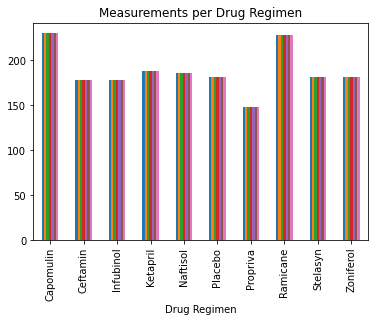

In [21]:
# measurementsPerRegimen.plot.bar(legend="", title="Measurements per Drug Regimen")
data.plot.bar(legend="", title="Measurements per Drug Regimen")

In [22]:
# 8 Generate a bar plot showing the total number of measurements taken on
# each drug regimen using pyplot.

In [23]:
xValues = [1,2,3,4,5,6,7,8,9,10]
xValues    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
# for i in list(measurementsPerRegimen):
#    print(measurementsPerRegimen[i].tolist())
for i in list(data):
    yValues = print(data[i].tolist())

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]


In [25]:
yValues = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

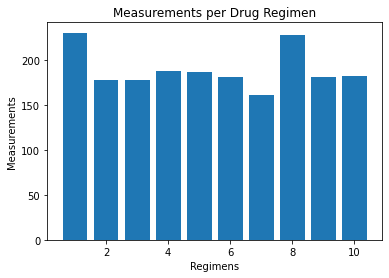

In [26]:
plt.bar(xValues, yValues)
plt.title("Measurements per Drug Regimen")
plt.ylabel("Measurements")
plt.xlabel("Regimens")
plt.show()

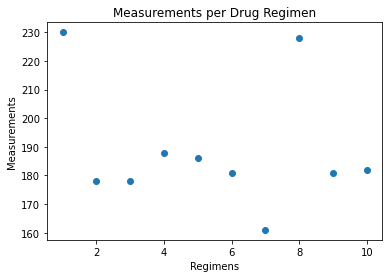

In [27]:
# plt.scatter(measurementsPerRegimen)
plt.scatter(xValues, yValues)
plt.title("Measurements per Drug Regimen")
plt.ylabel("Measurements")
plt.xlabel("Regimens")
plt.show()

# measurementsPerRegimen.plot.bar(legend="")
# plt.ylabel("measurements")
# plt.title("Measurements per Drug Regimen")

In [28]:
# 9 Generate a pie plot showing the distribution of female versus male mice using pandas
# This is going to use merged_df.
# miceCountByGender = merged_df.groupby(["Gender"]).count()
# miceCountByGender

miceByGender = merged_df.groupby(by="Sex").count()
miceByGender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [29]:
miceFemale = miceByGender.iloc[0,0]
miceFemale

922

In [30]:
miceMale = miceByGender.iloc[1,0]
miceMale

958

In [31]:
miceByGender = [miceFemale, miceMale]

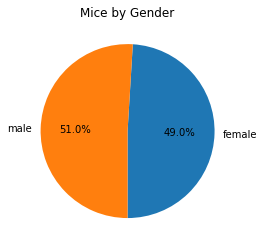

In [32]:
# 10 Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceByGender, labels=["female", "male"], startangle=-90, autopct="%1.1f%%")
plt.title("Mice by Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# 11 Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Just want to remind myself again what's in merged_df:
merged_df.head()
print(len(merged_df))

1880


In [34]:
# Start by getting the last (greatest) timepoint for each mouse
allRegimensMice = merged_df.groupby(["Mouse ID"]).max()["Timepoint"] 
allRegimensMice = allRegimensMice.reset_index()
allRegimensMice
# This is 248 again, which should be the mice in all ten drug regimens,
# minus the one duplicate record, not the mice in only the four regimens in question.

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [35]:
# 12 Merge this group df with the original dataframe to get the tumor volume at the last timepoint
allRegMiceData = pd.merge(allRegimensMice, merged_df, on=["Mouse ID", "Timepoint"])
allRegMiceData
# ...and this is still 248--good--but I must still need to take out 
# mice from the other six regimens. Perhaps I'll do that in a for-loop soon?

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [36]:
# 13 Put treatments into a list for for loop (and later for plot labels)
# listOfTreatments = allRegMiceData["Drug Regimen"]
# listOfTreatments
# That gave a long list of the regimen each of the mice were on.

# Seeing Zoe Poeschi's comment/question on Slack,
# I wonder if I misunderstood this instruction.
# Perhaps instruction 13 just means make a list of the four regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

fourRegimens = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
fourRegimens

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [40]:
# 14 Create empty list to fill with tumor vol data (for plotting)

# This generated a really long list, I think because I had it
# accidentally appending to itself:
# for mouse in fourRegMiceData:
#    tumorVolData.append(fourRegMiceData["Tumor Volume (mm3)"])

# This way seems cleaner, although I confess I don't understand
# what it's for:
tumorVolData = []
# Except maybe it's supposed to just be a empty list right now.
# tumorVolData = allRegMiceData["Tumor Volume (mm3)"]
# tumorVolData

In [41]:
# 15 Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
# This is my version of something Zoe posted to Slack:
for regimen in fourRegimens:
    allRegMiceData.loc[(allRegMiceData["Drug Regimen"].str.contains(regimen))]
    tumorVolData.append(allRegMiceData["Tumor Volume (mm3)"])
tumorVolData
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[0      67.973419
 1      65.525743
 2      70.717621
 3      62.999356
 4      63.440686
          ...    
 243    48.710661
 244    30.638696
 245    62.754451
 246    65.741070
 247    73.867845
 Name: Tumor Volume (mm3), Length: 248, dtype: float64,
 0      67.973419
 1      65.525743
 2      70.717621
 3      62.999356
 4      63.440686
          ...    
 243    48.710661
 244    30.638696
 245    62.754451
 246    65.741070
 247    73.867845
 Name: Tumor Volume (mm3), Length: 248, dtype: float64,
 0      67.973419
 1      65.525743
 2      70.717621
 3      62.999356
 4      63.440686
          ...    
 243    48.710661
 244    30.638696
 245    62.754451
 246    65.741070
 247    73.867845
 Name: Tumor Volume (mm3), Length: 248, dtype: float64,
 0      67.973419
 1      65.525743
 2      70.717621
 3      62.999356
 4      63.440686
          ...    
 243    48.710661
 244    30.638696
 245    62.754451
 246    65.741070
 247    73.867845
 Name: Tumor Volume (mm3), Length: 248, 

In [ ]:
# 16 Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Across All Regimens")
ax1.set_ylabel("Final Tumor Volume (cubic millimeters)")
ax1.boxplot(tumorVolData)
plt.show()

## Line and Scatter Plots

In [ ]:
# 17 Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# 18 Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# 19 Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
